In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
bikesdata = pd.read_csv('day.csv')
bikesdata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikesdata.shape

(730, 16)

In [4]:
bikesdata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bikesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Cleanup unnecessary columns

In [6]:
# Check all the values in yr column to see if it can be dropped
bikesdata.yr.unique()

array([0, 1], dtype=int64)

In [7]:
# instant is unique for each row
print(len(bikesdata.instant.unique()))

# dteday is unique for each row
print(len(bikesdata.dteday.unique()))

730
730


In [8]:
# Drop instant and dteday columns since they are all unique values
bikesdata.drop(['instant', 'dteday'], axis = 1, inplace=True)

# Drop registered and casual columns since we are only interested in cnt and not casual, registered (casual + registered = cnt)
bikesdata.drop(['casual', 'registered'], axis=1,inplace=True)


In [9]:

bikesdata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Visualizing the data
- Check for any collinearity


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

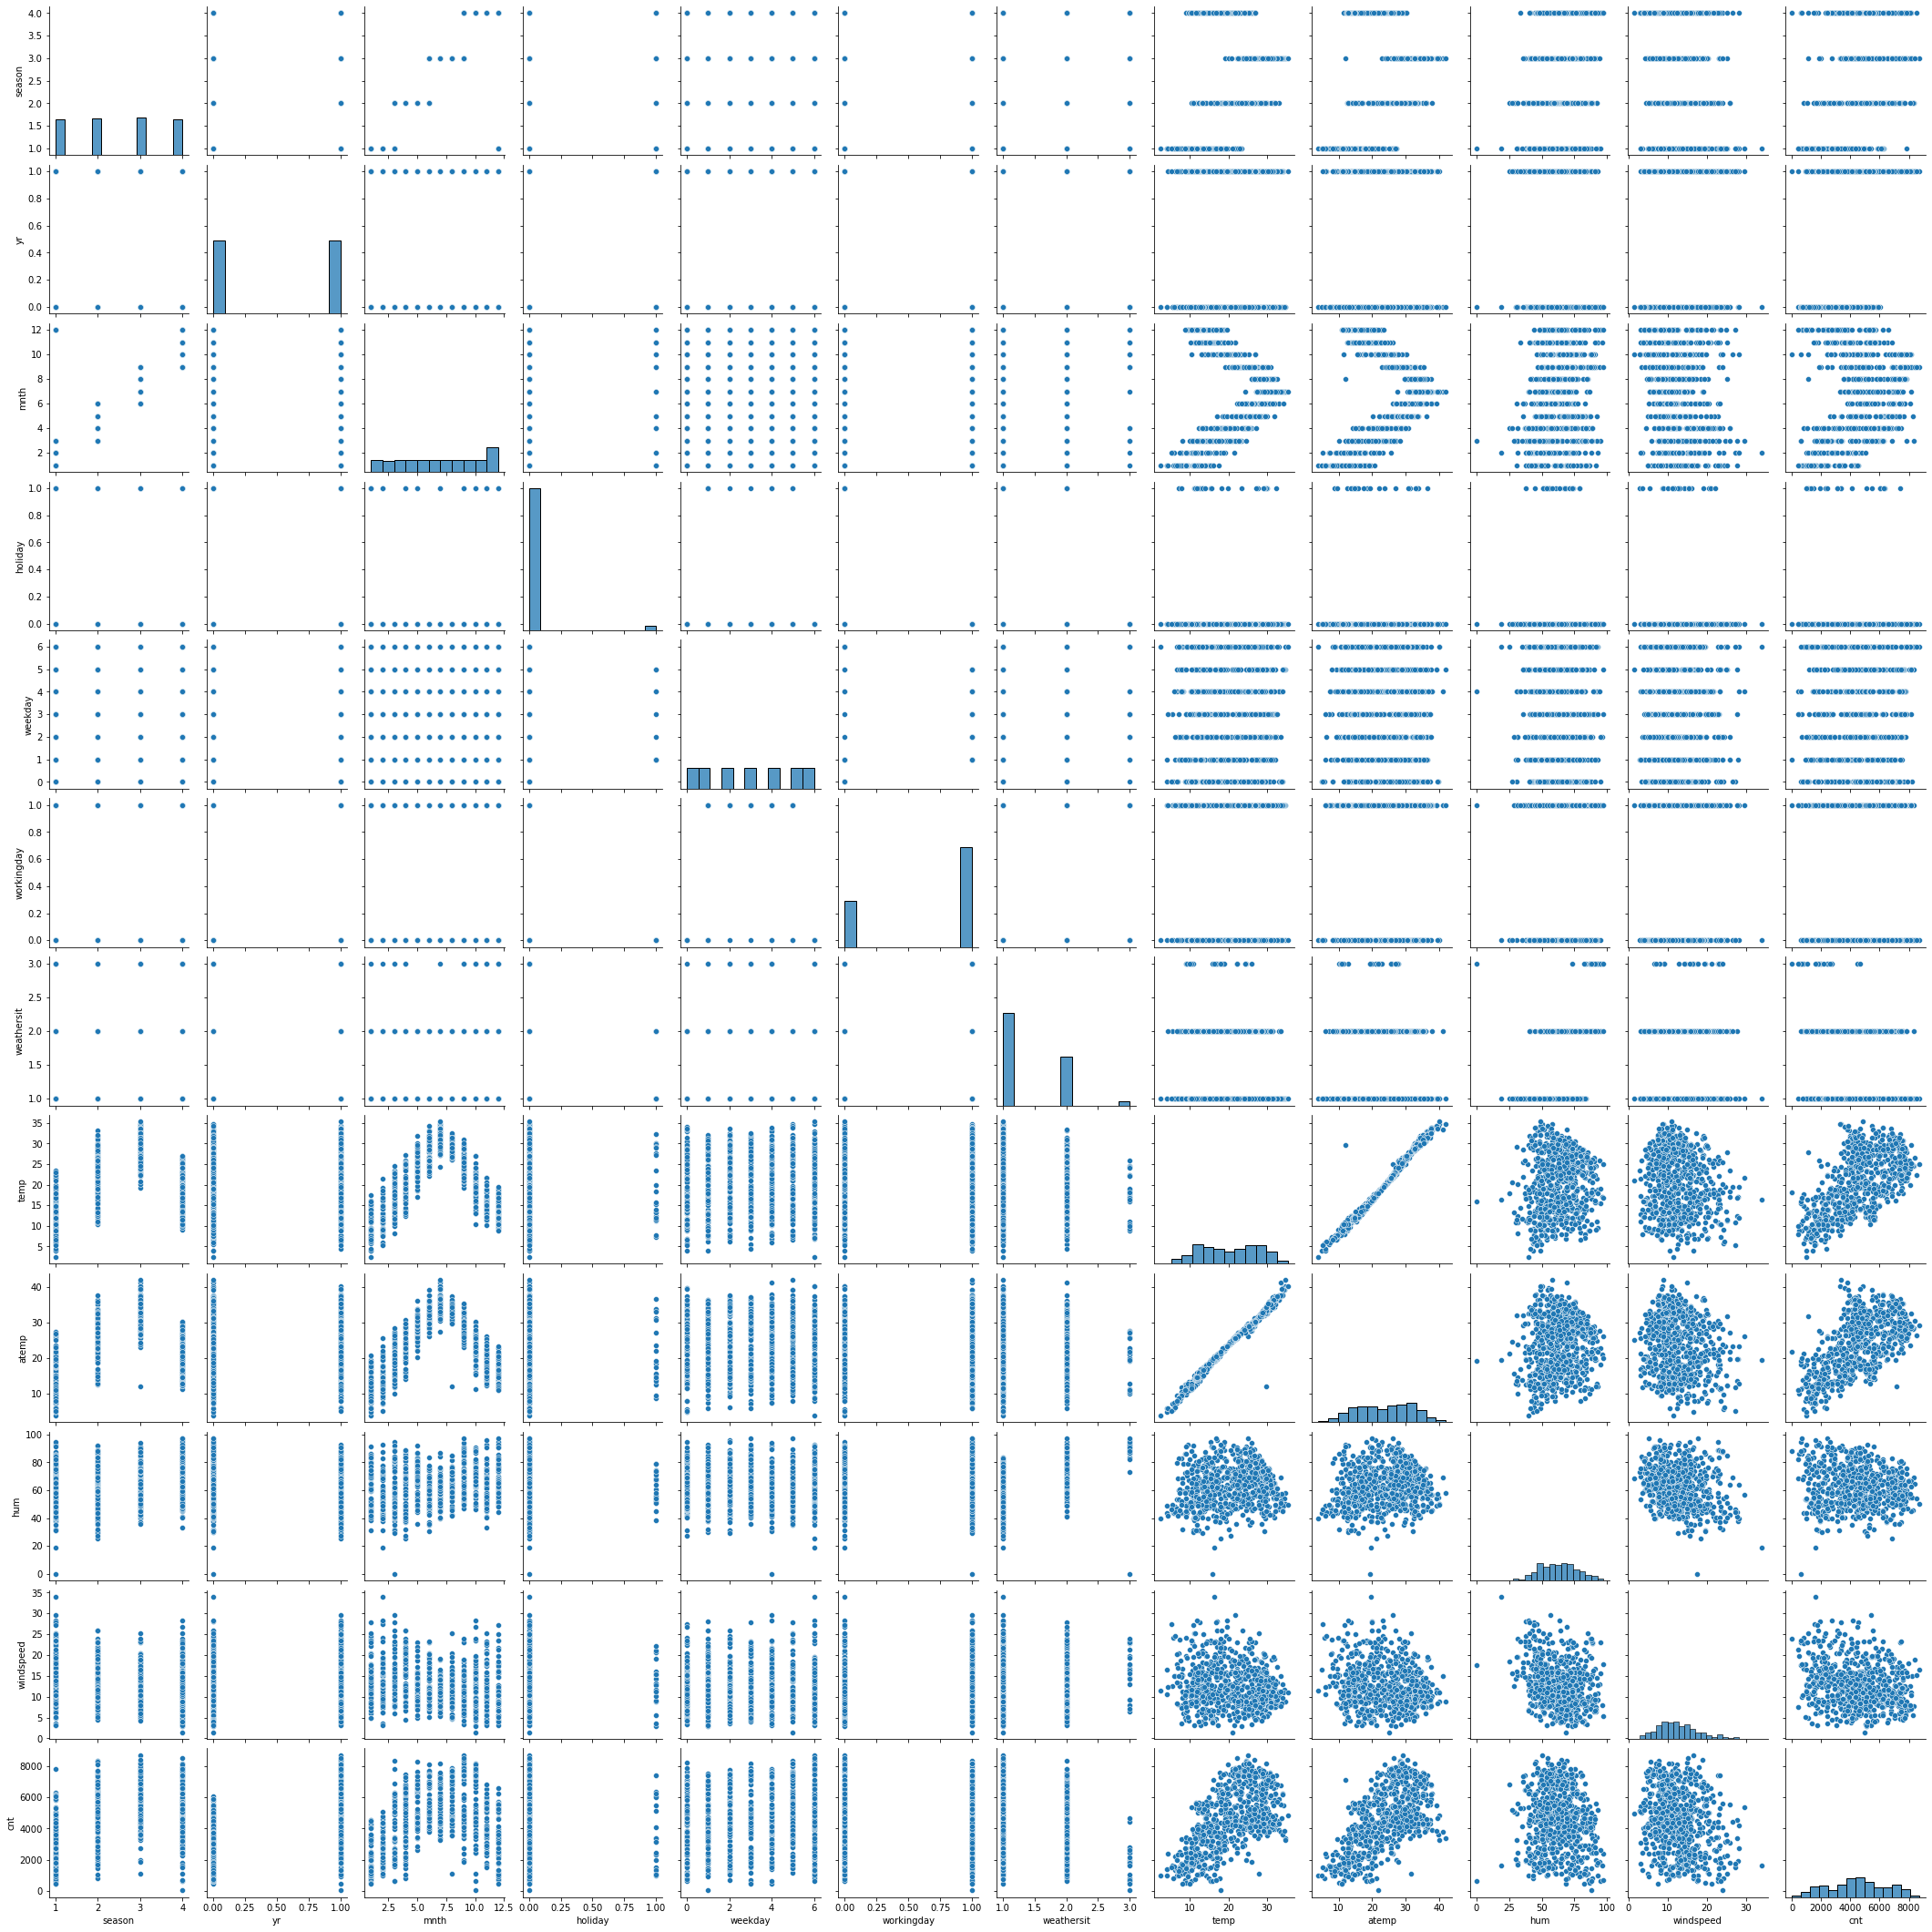

In [11]:
# Visualize the pairwise relationship between target and predictors
sns.pairplot(bikesdata)

# Observations from above pair plot
 
- season, yr, mnth, holiday, weekday, workingday, weathersit are categorical columns
- there seems be a linear relationship (highly corelated)  between atemp and temp columns and we can drop one of these columns

# Visualising Categorical Variables
Making boxplot of categorical columns (season, yr, mnth, holiday, weekday, workingday, weathersit)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

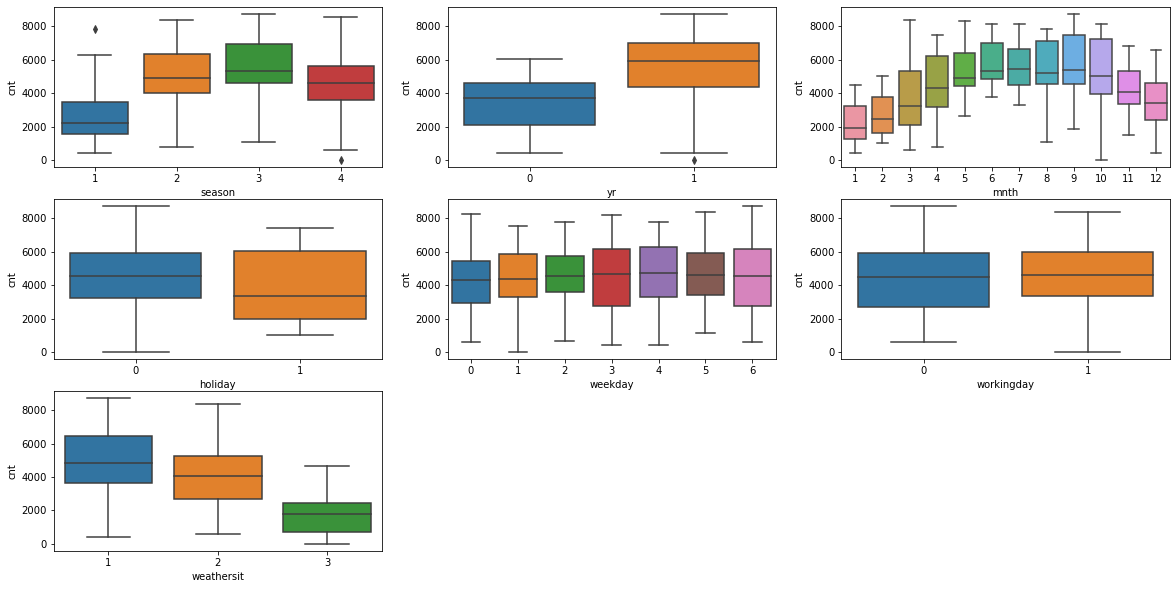

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bikesdata)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=bikesdata)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bikesdata)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=bikesdata)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=bikesdata)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bikesdata)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=bikesdata)


### Observations from above boxplots
- Spring(1) has less sales than other seasons
- 2019 has higher sales than 2018, but also has some outliers
- Months 4-7 have higher sales, which may be reflective of the summer weather
- Day of week, working day (neither weekend nor holiday) and holiday doesn't seem to have much effect on the sales
- Since holiday is subset of workingday (but negation) and doesn't seem to have much effect on sales, may be ideal to drop one or both the columns
- Weathersit shows better weather (1,2) clearly has better sales than bad weather (3,4)


## Data Prepepration
- Convert categorical columns to dummy variables

In [13]:
bikesdata.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [14]:
# List of categorical columns

category_col =  ['season', 'mnth', 'weekday', 'weathersit']

seasons = pd.get_dummies(bikesdata['season'], prefix='season', drop_first=True)
seasons.rename(columns={'season_2': 'season_summer', 'season_3': 'season_fall', 'season_4': 'season_winter' }, inplace=True)

mnths = pd.get_dummies(bikesdata['mnth'], prefix='month', drop_first=True);
mnths.rename(columns={
        'month_2': 'mnth_feb',
        'month_3': 'mnth_mar',
        'month_4': 'mnth_apr',
        'month_5': 'mnth_may',
        'month_6': 'mnth_jun',
        'month_7': 'mnth_jul',
        'month_8': 'mnth_aug',
        'month_9': 'mnth_sep',
        'month_10': 'mnth_oct',
        'month_11': 'mnth_nov',
        'month_12': 'mnth_dec'
    }, inplace=True)

weekdays = pd.get_dummies(bikesdata['weekday'],prefix='dayofweek', drop_first=True)

weekdays.rename(columns={
    'dayofweek_1': 'day_tue',
    'dayofweek_2': 'day_wed',
    'dayofweek_3': 'day_thu',
    'dayofweek_4': 'day_fri',
    'dayofweek_5': 'day_sat',
    'dayofweek_6': 'day_sun'
}, inplace=True)

weathersits = pd.get_dummies(bikesdata['weathersit'], prefix='weather', drop_first=True)
weathersits.rename(columns={
    'weather_2': 'wthr_cloudy_misty',
    'weather_3': 'wthr_snow_storms'
}, inplace=True)

bikesdata = pd.concat([bikesdata, seasons, mnths, weekdays, weathersits], axis=1)


In [15]:
#Drop the original categories columns which are encoded
bikesdata.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)

## Outlier Detection and Treatment

In [16]:
def outlier_treatment(df,column=None):
  """This function accepts a dataframe and a numerical column name for which outliers are treated"""
  df = df[df[column] < df[column].quantile(0.99)]
  return df

In [17]:
def outlier_treatment_columns(df,columns):
    for column in columns:
        df = df[df[column] < df[column].quantile(0.99)]
    return df

In [18]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

<AxesSubplot:xlabel='windspeed'>

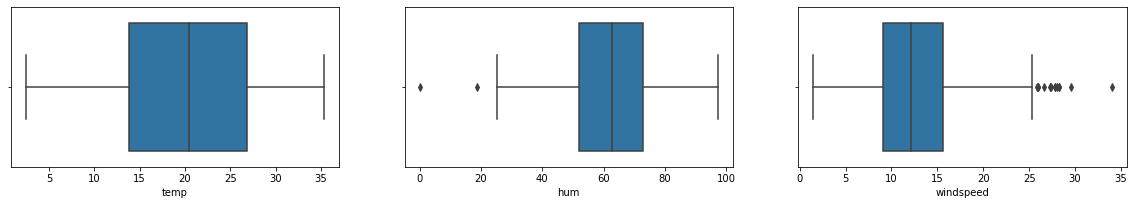

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(x='temp', data=bikesdata)
plt.subplot(3,3,2)
sns.boxplot(x='hum',data=bikesdata)
plt.subplot(3,3,3)
sns.boxplot(x='windspeed',data=bikesdata)

In [20]:

bikesdata = outlier_treatment_columns(bikesdata, num_vars)
bikesdata.shape

(698, 30)

## Split to Train and Test Data

In [21]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
bd_train, bd_test = train_test_split(bikesdata, train_size = 0.8, test_size=0.2, random_state=100)

## Rescaling the Features 
I am going to use Min-Max scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [23]:
bd_train[num_vars] = scaler.fit_transform(bd_train[num_vars])

In [24]:
bd_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,day_tue,day_wed,day_thu,day_fri,day_sat,day_sun,wthr_cloudy_misty,wthr_snow_storms
514,1,0,1,0.802023,0.796758,0.724324,0.290781,6855,1,0,...,0,0,0,0,1,0,0,0,1,0
646,1,0,1,0.520158,0.537665,0.823424,0.436177,6392,0,0,...,0,0,0,1,0,0,0,0,1,0
290,0,0,1,0.635364,0.664367,0.758559,0.227807,4748,0,0,...,0,0,0,1,0,0,0,0,1,0
425,1,0,1,0.394883,0.420456,0.710360,0.318252,3194,0,0,...,0,0,0,0,0,0,1,0,1,0
559,1,0,0,0.864659,0.878990,0.755856,0.315069,6969,0,1,...,0,0,0,0,0,0,0,1,1,0


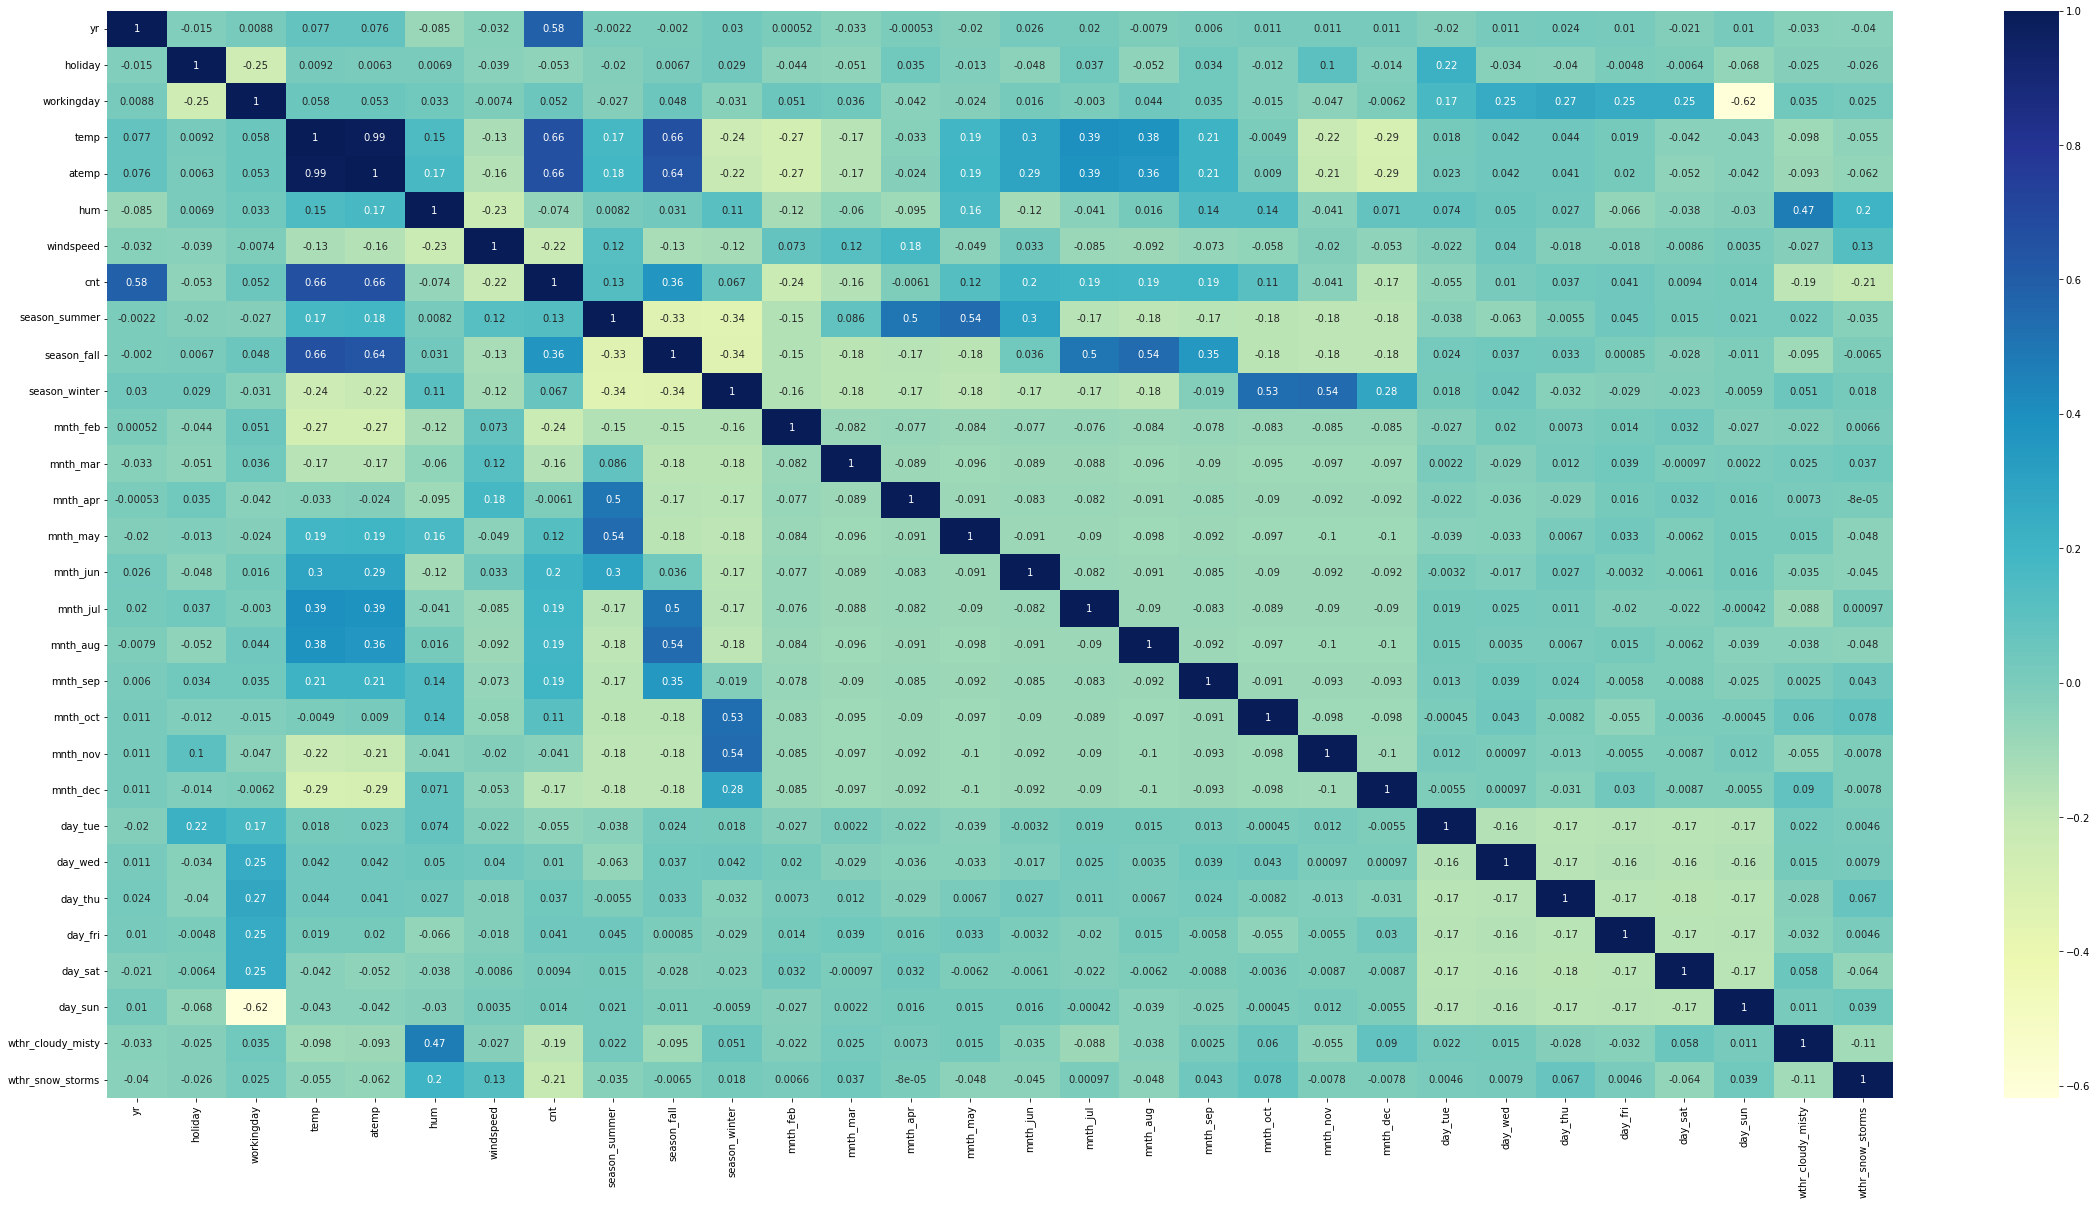

In [25]:
plt.figure(figsize = (40,20))        # Size of the figure
sns.heatmap(bd_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

### Obvervations from above correlation matrix
- Extremely high correlation between temp and atemp, so dropping atemp column
- High correlation between season and month (which makes total sense)

In [26]:
bd_train.drop(['atemp'], axis=1, inplace=True)
#bd_test.drop(['atemp'], axis=1, inplace=True)

### Dividing into X and Y sets for the model building

In [27]:
y_train = bd_train.pop('cnt')
X_train = bd_train

## RFE
- Recursive feature elimination

In [28]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def calculate_rfe(xtrain, ytrain, num_features):
    lm = LinearRegression()
    lm.fit(xtrain, ytrain)
    
    rfe = RFE(lm, num_features)
    rfe = rfe.fit(xtrain, ytrain)
    
    #list(zip(xtrain.columns,rfe.support_,rfe.ranking_))
    
    return rfe, lm

In [29]:
rfe,_ = calculate_rfe(X_train, y_train, 16)

In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_feb', False, 9),
 ('mnth_mar', True, 1),
 ('mnth_apr', True, 1),
 ('mnth_may', True, 1),
 ('mnth_jun', True, 1),
 ('mnth_jul', False, 10),
 ('mnth_aug', False, 12),
 ('mnth_sep', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_nov', False, 8),
 ('mnth_dec', False, 11),
 ('day_tue', False, 4),
 ('day_wed', False, 5),
 ('day_thu', False, 7),
 ('day_fri', False, 6),
 ('day_sat', True, 1),
 ('day_sun', False, 2),
 ('wthr_cloudy_misty', True, 1),
 ('wthr_snow_storms', True, 1)]

In [31]:
cols_include = X_train.columns[rfe.support_]
cols_include

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'mnth_mar', 'mnth_apr', 'mnth_may',
       'mnth_jun', 'mnth_sep', 'day_sat', 'wthr_cloudy_misty',
       'wthr_snow_storms'],
      dtype='object')

In [32]:
cols_exclude = X_train.columns[~rfe.support_]
cols_exclude

Index(['workingday', 'mnth_feb', 'mnth_jul', 'mnth_aug', 'mnth_oct',
       'mnth_nov', 'mnth_dec', 'day_tue', 'day_wed', 'day_thu', 'day_fri',
       'day_sun'],
      dtype='object')

In [33]:
X_train_rfe = X_train[cols_include]

### Build linear regression model

In [36]:
import statsmodels.api as sm

def getLinearRegressionModel(xtrain):
    # add constant
    xtrainlm = sm.add_constant(xtrain)
    
    # build linear model
    lrmodel = sm.OLS(y_train, xtrainlm).fit() 
    lrmodel.summary()
    
    return xtrainlm, lrmodel
    

In [37]:
# build linear model
X_train_lm, lm = getLinearRegressionModel(X_train_rfe)

In [38]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'mnth_mar', 'mnth_apr', 'mnth_may',
       'mnth_jun', 'mnth_sep', 'day_sat', 'wthr_cloudy_misty',
       'wthr_snow_storms'],
      dtype='object')

In [39]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     199.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.68e-214
Time:                        11:47:45   Log-Likelihood:                -4482.2
No. Observations:                 558   AIC:                             8998.
Df Residuals:                     541   BIC:                             9072.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1970.8115    228.179      8.637      0.000    1522.585    2419.038
yr                 2013.2554     65.408     30.780      0.000    1884.772    2141.739
holiday            -799.4377    199.274     -4.012      0.000   -1190.883    -407.992
temp               4197.6969    264.268     15.884      0.000    3678.581    4716.813
hum               -1613.1840    296.500     -5.441      0.000   -2195.616   -1030.752
windspeed         -1212.9977    182.738     -6.638      0.000   -1571.961    -854.035
season_summer       677.1643    180.841      3.745      0.000     321.928    1032.401
season_fall         733.6124    170.896      4.293      0.000     397.912    1069.313
season_winter      1505.4492    106.539     14.130      0.000    1296.168    1714.730
mnth_mar            400.6840    142.455      2.813      0.005     120.852     680.516
mnth_apr            405.4316    212.794      1.905      0.057     -12.572     823.435
mnth_may            528.5127    214.240      2.467      0.014     107.669     949.356
mnth_jun            340.1480    185.076      1.838      0.067     -23.408     703.704
mnth_sep            687.9039    130.130      5.286      0.000     432.283     943.525
day_sat             234.8936     91.132      2.578      0.010      55.878     413.909
wthr_cloudy_misty  -376.0452     83.279     -4.515      0.000    -539.636    -212.455
wthr_snow_storms  -1689.3517    232.082     -7.279      0.000   -2145.245   -1233.459
==============================================================================
Omnibus:                       86.098   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.752
Skew:                          -0.778   Prob(JB):                     1.57e-49
Kurtosis:                       5.691   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# drop columns with higher p-value (> 0.05)
def dropInsignificantColumns(lr):    
    numAttributes = len(lr.pvalues)
    drop_columns_index = []
    drop_columns = []

    # pvalues contans const that is not in original column list
    # make a list of all columns which have p-value greater than 0.05
    for attributeIndex in range (1, numAttributes):
        if lr.pvalues[attributeIndex] > 0.05:
            drop_columns_index.append(attributeIndex-1)
            drop_columns.append(X_train.columns[attributeIndex-1])


    print('Drop below columns with p-value greater than 0.05')
    print(drop_columns)
    print(lr.pvalues[drop_columns])
    lr.summary()
    return drop_columns

In [41]:
#drop_columns = dropInsignificantColumns(lm)

## Drop insignificant columns

In [42]:
#day_fri has maximim p-value
X_train_rfe.drop(['mnth_jun'], axis=1, inplace=True)


In [43]:
_,lm = getLinearRegressionModel(X_train_rfe)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     211.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.07e-215
Time:                        11:47:45   Log-Likelihood:                -4484.0
No. Observations:                 558   AIC:                             9000.
Df Residuals:                     542   BIC:                             9069.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1994.9870    228.299      8.738      0.000    1546.527    2443.447
yr                 2006.5589     65.449     30.658      0.000    1877.994    2135.124
holiday            -814.0136    199.552     -4.079      0.000   -1206.004    -422.023
temp               4361.2799    249.373     17.489      0.000    3871.424    4851.136
hum               -1698.3012    293.502     -5.786      0.000   -2274.843   -1121.760
windspeed         -1208.7785    183.124     -6.601      0.000   -1568.498    -849.059
season_summer       851.4948    154.305      5.518      0.000     548.385    1154.604
season_fall         663.9950    167.010      3.976      0.000     335.929     992.061
season_winter      1462.8022    104.209     14.037      0.000    1258.098    1667.506
mnth_mar            290.1963    129.431      2.242      0.025      35.948     544.445
mnth_apr            168.5742    169.700      0.993      0.321    -164.777     501.925
mnth_may            273.8964    163.777      1.672      0.095     -47.820     595.612
mnth_sep            667.3698    129.933      5.136      0.000     412.135     922.604
day_sat             233.2089     91.327      2.554      0.011      53.811     412.607
wthr_cloudy_misty  -364.5407     83.226     -4.380      0.000    -528.025    -201.056
wthr_snow_storms  -1679.0468    232.523     -7.221      0.000   -2135.804   -1222.290
==============================================================================
Omnibus:                       82.335   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.902
Skew:                          -0.758   Prob(JB):                     1.18e-45
Kurtosis:                       5.569   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# day_thu is most insignificant
X_train_rfe.drop(['mnth_may'], axis=1, inplace=True)

In [45]:
_,lm = getLinearRegressionModel(X_train_rfe)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     225.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.59e-215
Time:                        11:47:45   Log-Likelihood:                -4485.4
No. Observations:                 558   AIC:                             9001.
Df Residuals:                     543   BIC:                             9066.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1961.4460    227.792      8.611      0.000    1513.984    2408.908
yr                 2003.3686     65.529     30.572      0.000    1874.646    2132.091
holiday            -811.1004    199.875     -4.058      0.000   -1203.723    -418.478
temp               4382.9643    249.447     17.571      0.000    3892.964    4872.964
hum               -1622.1469    290.428     -5.585      0.000   -2192.646   -1051.648
windspeed         -1212.7004    183.412     -6.612      0.000   -1572.984    -852.417
season_summer       975.2731    135.620      7.191      0.000     708.869    1241.677
season_fall         633.9135    166.313      3.812      0.000     307.218     960.609
season_winter      1440.2586    103.505     13.915      0.000    1236.940    1643.577
mnth_mar            226.6545    123.933      1.829      0.068     -16.793     470.102
mnth_apr             26.3499    147.096      0.179      0.858    -262.597     315.297
mnth_sep            663.7645    130.130      5.101      0.000     408.144     919.385
day_sat             233.1378     91.478      2.549      0.011      53.444     412.832
wthr_cloudy_misty  -375.6043     83.100     -4.520      0.000    -538.840    -212.368
wthr_snow_storms  -1702.7843    232.473     -7.325      0.000   -2159.441   -1246.127
==============================================================================
Omnibus:                       81.441   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.770
Skew:                          -0.760   Prob(JB):                     6.88e-44
Kurtosis:                       5.498   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# day_sat is most insignificant
X_train_rfe.drop(['mnth_apr'], axis=1, inplace=True)

In [47]:
_,lm = getLinearRegressionModel(X_train_rfe)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     243.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.02e-216
Time:                        11:47:45   Log-Likelihood:                -4485.4
No. Observations:                 558   AIC:                             8999.
Df Residuals:                     544   BIC:                             9059.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1965.2871    226.579      8.674      0.000    1520.210    2410.364
yr                 2003.6506     65.452     30.612      0.000    1875.081    2132.221
holiday            -809.1036    199.386     -4.058      0.000   -1200.764    -417.443
temp               4373.3096    243.338     17.972      0.000    3895.312    4851.308
hum               -1625.3613    289.615     -5.612      0.000   -2194.262   -1056.461
windspeed         -1209.0031    182.085     -6.640      0.000   -1566.678    -851.328
season_summer       986.2999    120.738      8.169      0.000     749.130    1223.469
season_fall         638.7774    163.936      3.897      0.000     316.753     960.802
season_winter      1441.4363    103.204     13.967      0.000    1238.710    1644.163
mnth_mar            222.8453    121.987      1.827      0.068     -16.778     462.468
mnth_sep            663.6520    130.013      5.105      0.000     408.263     919.041
day_sat             233.4699     91.378      2.555      0.011      53.973     412.966
wthr_cloudy_misty  -375.2212     82.998     -4.521      0.000    -538.257    -212.185
wthr_snow_storms  -1701.9089    232.215     -7.329      0.000   -2158.057   -1245.761
==============================================================================
Omnibus:                       81.964   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.983
Skew:                          -0.763   Prob(JB):                     2.28e-44
Kurtosis:                       5.513   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# day_wed is most insignificant
X_train_rfe.drop(['mnth_mar'], axis=1, inplace=True)

In [49]:
_,lm = getLinearRegressionModel(X_train_rfe)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     261.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          3.23e-217
Time:                        11:47:45   Log-Likelihood:                -4487.1
No. Observations:                 558   AIC:                             9000.
Df Residuals:                     545   BIC:                             9056.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2013.8479    225.496      8.931      0.000    1570.899    2456.796
yr                 2000.3912     65.568     30.509      0.000    1871.594    2129.188
holiday            -824.1745    199.642     -4.128      0.000   -1216.336    -432.013
temp               4381.9259    243.814     17.972      0.000    3902.996    4860.856
hum               -1638.3868    290.147     -5.647      0.000   -2208.330   -1068.443
windspeed         -1194.4039    182.299     -6.552      0.000   -1552.498    -836.310
season_summer       963.2470    120.334      8.005      0.000     726.872    1199.622
season_fall         586.8816    161.801      3.627      0.000     269.051     904.712
season_winter      1392.7302     99.914     13.939      0.000    1196.467    1588.994
mnth_sep            664.5608    130.290      5.101      0.000     408.628     920.493
day_sat             230.5868     91.560      2.518      0.012      50.733     410.440
wthr_cloudy_misty  -370.7807     83.140     -4.460      0.000    -534.095    -207.466
wthr_snow_storms  -1686.0223    232.549     -7.250      0.000   -2142.825   -1229.220
==============================================================================
Omnibus:                       80.556   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.710
Skew:                          -0.734   Prob(JB):                     7.88e-46
Kurtosis:                       5.603   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# drop most insignificant
X_train_rfe.drop(['day_sat'], axis=1, inplace=True)

In [51]:
_,lm = getLinearRegressionModel(X_train_rfe)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     282.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.35e-217
Time:                        11:47:45   Log-Likelihood:                -4490.4
No. Observations:                 558   AIC:                             9005.
Df Residuals:                     546   BIC:                             9057.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2084.5802    224.832      9.272      0.000    1642.938    2526.223
yr                 1996.5191     65.870     30.310      0.000    1867.130    2125.908
holiday            -826.8952    200.613     -4.122      0.000   -1220.964    -432.827
temp               4373.5380    244.981     17.853      0.000    3892.318    4854.758
hum               -1678.2546    291.129     -5.765      0.000   -2250.124   -1106.385
windspeed         -1206.5456    183.124     -6.589      0.000   -1566.260    -846.831
season_summer       964.1277    120.921      7.973      0.000     726.601    1201.654
season_fall         583.1685    162.584      3.587      0.000     263.801     902.536
season_winter      1386.7729    100.373     13.816      0.000    1189.608    1583.938
mnth_sep            668.6231    130.916      5.107      0.000     411.462     925.784
wthr_cloudy_misty  -356.5027     83.351     -4.277      0.000    -520.232    -192.774
wthr_snow_storms  -1707.4146    233.528     -7.311      0.000   -2166.138   -1248.691
==============================================================================
Omnibus:                       81.577   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.396
Skew:                          -0.758   Prob(JB):                     1.85e-44
Kurtosis:                       5.523   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Check VIF

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  

def calculate_vif_recursive(X, thresh=5):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]
    
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True
        if len(variables) == 1:
            return X[cols[variables]]
            break
    
    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]



In [53]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(xtrain):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = xtrain.columns
    vif['VIF'] = [variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [54]:
#X_train_vif = calculate_vif_recursive(X_train_lm)

In [55]:
vif = calculate_vif(X_train_rfe)
vif

,Features,VIF
2,temp,21.90
3,hum,15.24
6,season_fall,6.28
4,windspeed,4.57
5,season_summer,3.52
7,season_winter,2.45
0,yr,2.03
9,wthr_cloudy_misty,2.03
8,mnth_sep,1.28
10,wthr_snow_storms,1.13


In [56]:
# temp has high vif and dropping that column
X_train_vif = X_train_rfe.drop(['temp'], axis=1)


In [57]:
# Check linear regression again
_,lm = getLinearRegressionModel(X_train_vif)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     176.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.40e-164
Time:                        11:47:46   Log-Likelihood:                -4618.6
No. Observations:                 558   AIC:                             9259.
Df Residuals:                     547   BIC:                             9307.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2718.0640    279.141      9.737      0.000    2169.744    3266.384
yr                 2166.9789     81.944     26.445      0.000    2006.015    2327.943
holiday            -805.2400    252.229     -3.193      0.001   -1300.695    -309.785
hum                -414.7188    355.058     -1.168      0.243   -1112.163     282.725
windspeed         -1234.2396    230.236     -5.361      0.000   -1686.494    -781.985
season_summer      2342.5131    117.008     20.020      0.000    2112.674    2572.352
season_fall        2877.0782    125.249     22.971      0.000    2631.050    3123.106
season_winter      2001.0169    118.555     16.878      0.000    1768.139    2233.895
mnth_sep            478.7960    164.058      2.918      0.004     156.534     801.058
wthr_cloudy_misty  -631.4509    102.994     -6.131      0.000    -833.764    -429.138
wthr_snow_storms  -2240.6960    291.205     -7.695      0.000   -2812.714   -1668.678
==============================================================================
Omnibus:                       43.865   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.326
Skew:                          -0.428   Prob(JB):                     9.94e-23
Kurtosis:                       4.904   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations from dropping "temp" column
- r2 reduces from 0.85 to 0.76
- May not be a good idea to drop the temp column
- Lets try dropping column with next highest vif value, which is hum

In [58]:
# hum has high vif and dropping that column
X_train_vif = X_train_rfe.drop(['hum'], axis=1)

In [59]:
# Check linear regression again
_,lm = getLinearRegressionModel(X_train_vif)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     290.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.40e-211
Time:                        11:47:46   Log-Likelihood:                -4506.9
No. Observations:                 558   AIC:                             9036.
Df Residuals:                     547   BIC:                             9083.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1071.3876    144.279      7.426      0.000     787.979    1354.797
yr                 2042.2313     67.290     30.350      0.000    1910.053    2174.409
holiday            -840.4056    206.425     -4.071      0.000   -1245.888    -434.923
temp               4030.2124    244.532     16.481      0.000    3549.876    4510.549
windspeed          -920.3391    181.384     -5.074      0.000   -1276.634    -564.044
season_summer       998.6330    124.279      8.035      0.000     754.509    1242.756
season_fall         704.6755    165.894      4.248      0.000     378.809    1030.542
season_winter      1358.6770    103.166     13.170      0.000    1156.026    1561.328
mnth_sep            568.5994    133.529      4.258      0.000     306.306     830.893
wthr_cloudy_misty  -621.5024     71.548     -8.687      0.000    -762.045    -480.960
wthr_snow_storms  -2180.0562    225.012     -9.689      0.000   -2622.049   -1738.063
==============================================================================
Omnibus:                       82.240   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.542
Skew:                          -0.759   Prob(JB):                     2.33e-45
Kurtosis:                       5.556   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#calculate vif
vif = calculate_vif(X_train_vif)
vif

,Features,VIF
2,temp,14.14
5,season_fall,5.93
3,windspeed,3.87
4,season_summer,3.47
6,season_winter,2.39
0,yr,2.03
8,wthr_cloudy_misty,1.47
7,mnth_sep,1.27
9,wthr_snow_storms,1.06
1,holiday,1.03


In [61]:
# dropping temp has high vif and dropping that column
X_train_vif_1 = X_train_vif.drop(['temp'], axis=1)

In [62]:
# Check linear regression again
_,lm = getLinearRegressionModel(X_train_vif_1)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     195.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          8.76e-165
Time:                        11:47:46   Log-Likelihood:                -4619.3
No. Observations:                 558   AIC:                             9259.
Df Residuals:                     548   BIC:                             9302.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2438.9032    144.264     16.906      0.000    2155.524    2722.282
yr                 2175.4702     81.648     26.644      0.000    2015.088    2335.852
holiday            -809.2348    252.289     -3.208      0.001   -1304.807    -313.662
windspeed         -1158.5006    220.990     -5.242      0.000   -1592.591    -724.410
season_summer      2323.1572    115.867     20.050      0.000    2095.560    2550.754
season_fall        2861.6966    124.596     22.968      0.000    2616.952    3106.441
season_winter      1980.9740    117.345     16.882      0.000    1750.473    2211.475
mnth_sep            456.4399    162.992      2.800      0.005     136.274     776.606
wthr_cloudy_misty  -695.3806     87.276     -7.968      0.000    -866.818    -523.943
wthr_snow_storms  -2353.8338    274.715     -8.568      0.000   -2893.458   -1814.210
==============================================================================
Omnibus:                       43.761   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.836
Skew:                          -0.435   Prob(JB):                     3.45e-22
Kurtosis:                       4.870   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Observations from dropping temp column
- r2 greatly reduces from 0.84 to 0.76
- So we keep this column and try dropping season season_fall column instead

In [63]:
# dropping season_fall has high vif and dropping that column
X_train_vif_1 = X_train_vif.drop(['season_fall'], axis=1)

In [64]:
#calculate vif
vif = calculate_vif(X_train_vif_1)
vif

,Features,VIF
2,temp,4.15
3,windspeed,3.71
0,yr,1.99
4,season_summer,1.62
7,wthr_cloudy_misty,1.46
5,season_winter,1.40
6,mnth_sep,1.20
8,wthr_snow_storms,1.06
1,holiday,1.03


In [65]:
# Check linear regression again
X_train_vif_lm,lm = getLinearRegressionModel(X_train_vif_1)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     310.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          9.24e-209
Time:                        11:47:46   Log-Likelihood:                -4515.9
No. Observations:                 558   AIC:                             9052.
Df Residuals:                     548   BIC:                             9095.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               948.4346    143.527      6.608      0.000     666.504    1230.365
yr                 2016.0535     68.041     29.630      0.000    1882.400    2149.707
holiday            -848.7701    209.601     -4.049      0.000   -1260.490    -437.051
temp               4849.6714    152.583     31.784      0.000    4549.952    5149.391
windspeed          -939.6195    184.126     -5.103      0.000   -1301.298    -577.941
season_summer       611.4777     85.792      7.127      0.000     442.956     779.999
season_winter      1101.8156     84.876     12.981      0.000     935.093    1268.538
mnth_sep            703.1813    131.718      5.339      0.000     444.447     961.915
wthr_cloudy_misty  -622.4965     72.652     -8.568      0.000    -765.206    -479.787
wthr_snow_storms  -2158.0605    228.424     -9.448      0.000   -2606.754   -1709.367
==============================================================================
Omnibus:                       71.283   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.628
Skew:                          -0.718   Prob(JB):                     1.96e-33
Kurtosis:                       5.101   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
X_train = X_train_vif_1
X_train_lm = X_train_vif_lm

### Above linear regression model seems good by following observation
- All the columsn have 0 pvalue
- r2 and r2 adjusted are same and equal to 0.81
- p(f-stat) is almost zero


## Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [67]:
y_train_cnt = lm.predict(X_train_lm)

In [68]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

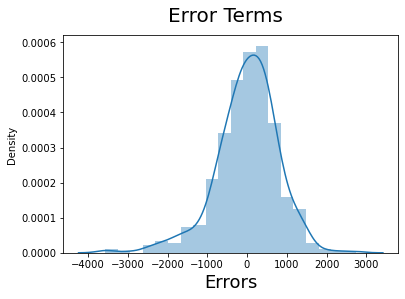

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### We can see from histogram above that error terms are normally distributed around zero

### Predictions


In [70]:
X_train.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_sep', 'wthr_cloudy_misty', 'wthr_snow_storms'],
      dtype='object')

In [71]:
bd_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_summer', 'season_fall', 'season_winter', 'mnth_feb',
       'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun', 'mnth_jul', 'mnth_aug',
       'mnth_sep', 'mnth_oct', 'mnth_nov', 'mnth_dec', 'day_tue', 'day_wed',
       'day_thu', 'day_fri', 'day_sat', 'day_sun', 'wthr_cloudy_misty',
       'wthr_snow_storms'],
      dtype='object')

In [72]:
#num_vars = ['temp', 'hum', 'windspeed']
bd_test[num_vars] = scaler.transform(bd_test[num_vars])

In [73]:
y_test = bd_test.pop('cnt')
X_test = bd_test

In [74]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [75]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

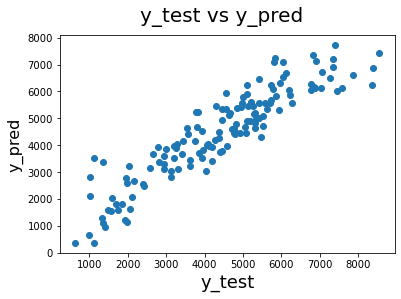

In [76]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [77]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [78]:
bd_results = calculate_residuals(lm, X_test_new, y_test)

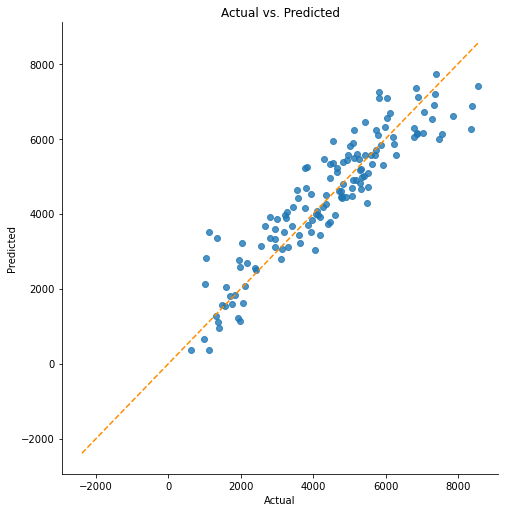

In [79]:
# Plotting the actual vs predicted values
sns.lmplot(x='Actual', y='Predicted', data=bd_results, fit_reg=False, height=7)
    
# Plotting the diagonal line
line_coords = np.arange(bd_results.min().min(), bd_results.max().max())
plt.plot(line_coords, line_coords,  # X and y points
          color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()



In [88]:
X_test_new.shape
bd_results.head()

,Actual,Predicted,Residuals
403,2802,3356.078619,-554.078619
335,3940,3519.090191,420.909809
238,1115,3505.195011,-2390.195011
444,6230,5865.410508,364.589492
415,3129,3048.921396,80.078604


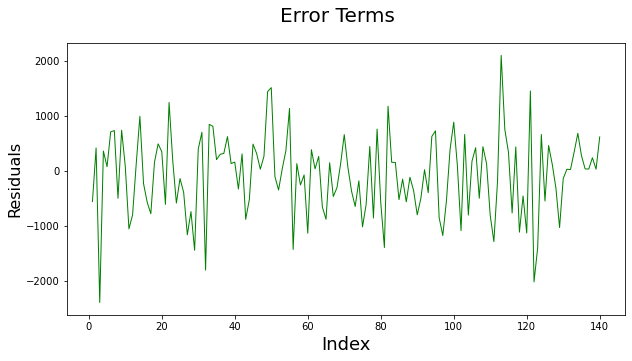

In [100]:
# Plotting y_test and y_pred to understand the spread.
index = [i for i in range(1,bd_results.shape[0]+1,1)]
fig = plt.figure(figsize=(10, 5))
plt.plot(index,bd_results.Residuals, color="green", linewidth=1, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)          
plt.xlabel('Index', fontsize=18)                    
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [81]:
#r2 score for train data

from sklearn.metrics import r2_score
r2_score(y_train, y_train_cnt)

0.8361509293208533

The plot shows a linear relationship between the actual and predicted values.

In [82]:
#r2 score for test data
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8356310954332782

### **** r2-score for test data (0.83) same as train data. Which shows that model is fairly accurate ***

## Overall we have decent (tight) linear regression model for BoomBikes rentals

In [83]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     310.7
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          9.24e-209
Time:                        11:52:58   Log-Likelihood:                -4515.9
No. Observations:                 558   AIC:                             9052.
Df Residuals:                     548   BIC:                             9095.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               948.4346    143.527      6.608      0.000     666.504    1230.365
yr                 2016.0535     68.041     29.630      0.000    1882.400    2149.707
holiday            -848.7701    209.601     -4.049      0.000   -1260.490    -437.051
temp               4849.6714    152.583     31.784      0.000    4549.952    5149.391
windspeed          -939.6195    184.126     -5.103      0.000   -1301.298    -577.941
season_summer       611.4777     85.792      7.127      0.000     442.956     779.999
season_winter      1101.8156     84.876     12.981      0.000     935.093    1268.538
mnth_sep            703.1813    131.718      5.339      0.000     444.447     961.915
wthr_cloudy_misty  -622.4965     72.652     -8.568      0.000    -765.206    -479.787
wthr_snow_storms  -2158.0605    228.424     -9.448      0.000   -2606.754   -1709.367
==============================================================================
Omnibus:                       71.283   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.628
Skew:                          -0.718   Prob(JB):                     1.96e-33
Kurtosis:                       5.101   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""